# 21 훈련된 모델 저장하기 : sklearn / keras
* 모델링이 가치를 발하려면 기존 소프트웨어 애플리케이션과 통합되는 등 모델을 활용해야한다
* 모델을 사용하기 위해선 다른 애플리케이션이나 워크플로에서 사용할 수 있도록 모델을 파일로 저장해야 함
* 따라서 훈련 후에 모델을 저장하고 애플리케이션이 필요할 때 이를 복원할 수 있어야 한다


## 21.1 사이킷런 모델을 저장하고 복원하기
### import joblib  
* pickle type : 파이썬 고유 데이터 포맷
* 피클을 확장한 것
* 사이킷런의 훈련된 모델에서 흔히 발생하는 대규모 numpy 배열을 다룰 때 유용함

In [3]:
# 모델을 피클 파일로 저장한다
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import joblib

In [4]:
# 데이터 로드
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 결정분류기 제작 후 훈련
classifier = RandomForestClassifier()
model = classifier.fit(features, target)
joblib.dump(model, "model.pkl")

/Users/yeonjin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['model.pkl']

In [8]:
# 파일에서 모델을 복원한다
classifier2 = joblib.load('model.pkl')

In [9]:
# 복원된 모델로 예측 수행
new_observation = [[5.2, 3.2, 1.1, 0.1]]

# 샘플의 클래스를 예측한다
classifier2.predict(new_observation)

array([0])

In [11]:
# 사이킷런 모델을 저장할 때는 저장된 모델이 사이킷런 버전 간에 호환되는지 주의하기.
# 따라서 사이킷런 버전을 포함시키는 것이 중요함
import sklearn
scikit_version = sklearn.__version__
joblib.dump(model, f"model_{scikit_version}.pkl")

['model_0.21.3.pkl']

## 21.2 케라스 모델을 저장하고 복원하기
* pickle 사용하지 않음
### HDF5파일
* 모델을 복원하여 예측하는 것 ( 모델 구조와 훈련된 모델 파라미터 )
* 다시 훈련하기 윟해 필요한 모든 것 ( 손실, 옵티마이저 설정과 현재 상태 )    
모두를 저장함

In [2]:
#pip install tensorflow

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import load_model

In [2]:
np.random.seed(0)

In [3]:
number_of_features = 1000

In [7]:
# 영화 리뷰 데이터와 타깃 벡터를 로드함
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words = number_of_features)

In [9]:
# 영화 리뷰 데이터를 원핫 인코딩 특성행렬로 변환한다
tokenizer = Tokenizer(num_words = number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode = 'binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode = 'binary')

### sequences_to_matrix 
sequences_to_matrix(tokenizer, sequences, mode = c("binary", "count","tfidf", "freq"))     
* tokenizer : 문자열을 여러개의 조각, 즉 여러 개의 Token(토큰)들로 쪼개는 것을 말한다.
* sequences : List of sequences (a sequence is a list of integer word indices)
* mode : tfidf 
    * 어떤 단어가 해당 문서 내부에서 얼마나 중요한지 나타내는 통계적 수치 
    * TF(단어 빈도, term frequency) x IDF(역문서 빈도, inverse document frequency)

In [10]:
# 신경망 모델 만들기
network = models.Sequential()

# ReLU 활성화 함수를 사용한 완전 연결층을 추가
network.add(layers.Dense(units = 16, 
                        activation = 'relu',
                        input_shape = (number_of_features,)))

# 시그모이드 활성화 함수를 사용한 완전 연결층을 추가
network.add(layers.Dense(units =1 , activation = 'sigmoid'))

# 신경망 모델의 설정을 완료
network.compile(loss = 'binary_crossentropy', # 크로스 엔트로피
               optimizer = 'rmsprop', # 최적화 알고리즘
               metrics = ['accuracy']) # 정확도

In [11]:
# 신경망 훈련하기
history = network.fit(train_features, #특성
                      train_target, #타깃벡터
                      epochs = 3, #에폭횟수
                      verbose =0, #출력없음
                      batch_size = 100, #배치 샘플 수
                      validation_data = (test_features, test_target)
                     )

In [12]:
network.save('model.h5')

In [13]:
network2 = load_model('model.h5')

## 궁금했던 정규표현식

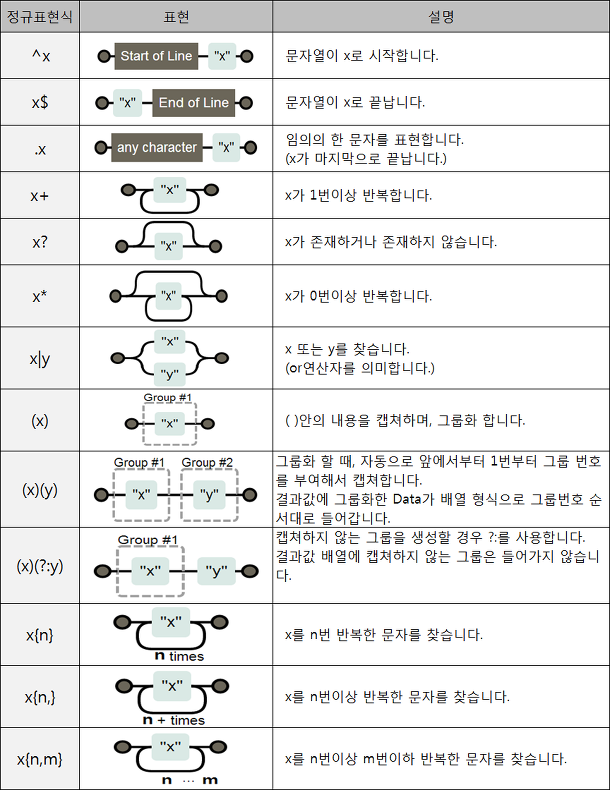
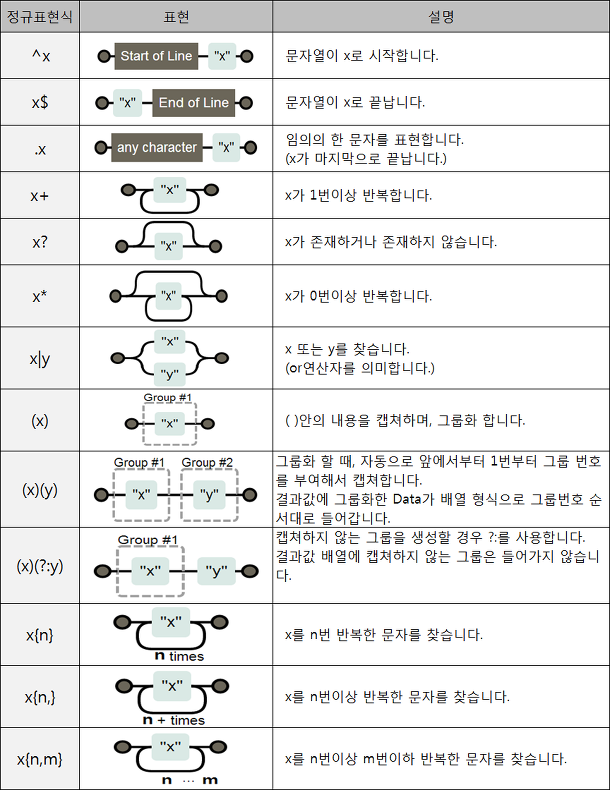